In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import numpy.ma as ma
import glob
import matplotlib.colors as colors
from IPython.display import display, Math, Latex

from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import warnings

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import map

%matplotlib inline

In [25]:
def plot_arctic(ax,zonal_var,label,ticks=None,log=False, sym=False,diffplot=False,min_log=None,max_scale=None):
    
    '''
    zonal_var = zonal variable that is 50X800
    min_log = either the minimum value in log or the smallest log on positive or negative magnitude in symlog
    max_scale = max value of variable
    title = title of the contour plot
    ticks = optional variable that can contain a list of ticks for the colorbar
    sym = if set to true the symlog scale will be used to account for positive and negative values
    
    '''
    
    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True',ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.85',alpha=0.5)
    m.drawparallels(np.arange(-90.,90.,20.),labels=[0, 0, 0, 0])
    x_lon,y_lat=m(nav_lon[300:,:],nav_lat[300:,:])
    vmax = 10**(-15)

    
    x = np.arange(0,500)
    y = np.arange(0,544)
    X, Y = np.meshgrid(x[:], y[:])
    
    cmap = plt.get_cmap('inferno',25)
    #cmap.set_bad('burlywood')
    cmap.set_over(color='grey')

    if log == True:
        cmap = plt.get_cmap('seismic',25)
        cmap.set_bad('burlywood')
        cmap.set_over(color='grey')
        minimum_log_level = min_log
        maximum_scale_level = max_scale
        norm = colors.LogNorm(vmin=minimum_log_level,
                                 vmax=maximum_scale_level)
        
        m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap,norm=norm)
        
        
    elif sym == True:
        minimum_log_level = min_log
        maximum_scale_level = max_scale
        norm = colors.SymLogNorm(vmin=-maximum_scale_level,
                                 vmax=maximum_scale_level,linthresh=minimum_log_level,linscale=0)
        cmap = plt.get_cmap('seismic',24)
        cmap.set_bad('burlywood')
        m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap,norm=norm)
        
    elif diffplot==True:
        cmap = plt.get_cmap('seismic',25)
        cmap.set_bad('burlywood')
        cmap.set_over(color='grey')
        mesh = m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap, vmin=min_log, vmax=max_scale)
    else:
        if min_log != None:
            mesh = m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap,vmin=min_log, vmax=max_scale)
            
        else:
    
            mesh = m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap)
        
    cb = m.colorbar(mesh)
    cb.set_label(label, fontsize=18)
    cb.ax.tick_params(labelsize=18)
    #ax.set_title('{d:.0f} m'.format(d=zlevels[depth]))

    
    return mesh

In [3]:
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'
stlandj = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'
polzin  = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'

In [4]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
mbathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)

In [5]:
H=mesh.variables['gdept_0'][0]
nav_lat=mesh.variables['nav_lat']
nav_lon=mesh.variables['nav_lon']
e1t= mesh.variables['e1t'][0,:,:]  # dx
e2t= mesh.variables['e2t'][0,:,:]  # dy 
e3t= mesh.variables['e3t'][0,:,:,:]
volume=e1t*e2t*e3t
volume_density = (volume / np.sum(volume))*100

In [6]:
ctemp = ma.array(nc.Dataset(control_storage+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
#csalt = ma.array(nc.Dataset(control_storage+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)

sjtemp = ma.array(nc.Dataset(stlandj+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
#sjsalt = ma.array(nc.Dataset(stlandj+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)

ptemp = ma.array(nc.Dataset(polzin+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
#psalt = ma.array(nc.Dataset(polzin+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)


In [7]:
maskfile='/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_mask.nc'
meshzgr='/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_mesh_zgr.nc'
meshhgr='/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_mesh_hgr.nc'

In [8]:
ncid = nc.Dataset(maskfile)
ncid2 = nc.Dataset(meshzgr)
ncid3 = nc.Dataset(meshhgr)
tmask = ncid.variables['tmask'][0,:,:,:]
e1t = ncid.variables['e1t'][0,:,:]
e2t = ncid.variables['e2t'][0,:,:]
e3t_ps = ncid2.variables['e3t_ps'][0,:,:]
hdept = ncid2.variables['hdept'][0,:,:]
gdept_0 = ncid2.variables['gdept_0'][0,:]

In [9]:
base = np.zeros((50))
for kk in range(0,49):
    base[kk] = (gdept_0[kk]+gdept_0[kk+1])/2.0
    
base[-1] = base[-2]

In [14]:
thick = np.zeros((50))
thick[0] = base[0] - 0.0

In [15]:
thick

array([ 1.01770041,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [18]:
def FWC(var, thick, base):
    #here we want to calculate down to the 34.8 isopycnal only
    sal = 34.8
    new_var = np.zeros_like(var)
#    volume = np.zeros_like(var)
#    depth = np.zeros((800,544))
    var = ma.masked_where(var[:,:,:]>34.8, var)
    for kk in np.arange(0,len(var[:,0,0])-1):

#         for jj in np.arange(0,len(var[0,0,:])):
#             depcount = 0
#             for kk in np.arange(len(var[:,0,0])):

                

            thick[kk+1] = base[kk+1] - base[kk]
            new_var[kk,:,:] = ((sal - var[kk,:,:])*thick[kk])/sal
#            volume[kk,:,:] = e1t[:,:]*e2t[:,:]*thick[kk]
    new_var = np.sum(new_var,axis=0)       
               
    return new_var

def HC(var,thick, base):
    #sums first 1000m
    rho0 = 1020.0
    Cp=4187.0
    new_var = np.zeros_like(var)
    for kk in np.arange(0,len(var[:,0,0])-1):
        thick[kk+1] = base[kk+1] - base[kk]
        new_var[kk,:,:] = (var[kk,:,:]-(-1.8))*rho0*Cp*thick[kk]
    new_var = np.sum(new_var[:,:,:],axis=0)/(1.0e10)
    return new_var

In [12]:
def iso_depth(var, value, calcvar):
    var = ma.masked_where(var[:,:,:]>value, var)
    depth_val = var.count(axis=0)
    d = np.zeros_like(var[0,:,:])
    for i in range(0,800):
        for j in range(0,544):
            if depth_val[i,j] == 0:
                d[i,j] = 0
                calcvar[i,j] = 0
            else:
                d[i,j] = H[depth_val[i,j]-1]

    d = ma.array(d, mask=(mask[0]-1)*-1)
    calcvar = ma.array(calcvar, mask=(mask[0]-1)*-1)
    
    return d, calcvar

In [19]:
cHC = HC(ctemp,thick,base)
#cFWC = FWC(csalt, thick, base)
#cdep, cFWC = iso_depth(csalt, 34.8,cFWC)

/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


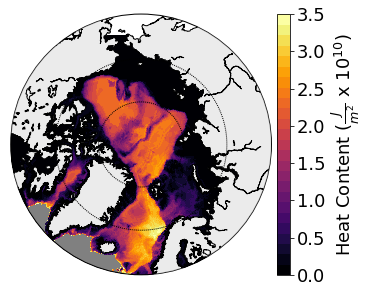

In [23]:
# fig, axes = plt.subplots(1, 2, figsize=(10,5))
# label = 'Fresh water Content (m)'
# label2 = 'Depth of 34.8 isopycnal (m)'
# plotFWC = plot_arctic(axes[0],cFWC[300:,:],label,min_log = 0, max_scale=30)
# plotdep = plot_arctic(axes[1],cdep[300:,:],label2)


fig, axes = plt.subplots(1, 1, figsize=(5,5))
label_heat = 'Heat Content ('+r'$\frac{J}{m^2}$'+' x '+r'${10^{10}}$'+')'
plotHC = plot_arctic(axes,cHC[300:,:],label_heat,min_log = 0.0, max_scale=3.5)

In [20]:
sjHC = HC(sjtemp, thick,base)
#sjFWC = FWC(sjsalt, thick, base)
#sjdep, sjFWC = iso_depth(sjsalt, 34.8,sjFWC)


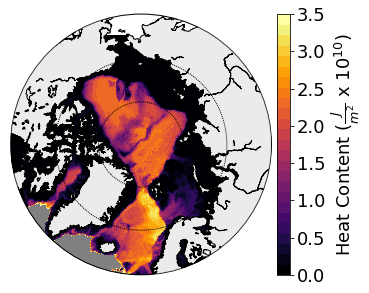

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
plotHC = plot_arctic(axes,sjHC[300:,:],label_heat,min_log = 0.0, max_scale=3.5)

# fig, axes = plt.subplots(1, 2, figsize=(10,5))
# label = 'Fresh water Content (m)'
# label2 = 'Depth of 34.8 isopycnal (m)'
# plotFWC = plot_arctic(axes[0],sjFWC[300:,:],label,min_log = 0, max_scale=30)
# plotdep = plot_arctic(axes[1],sjdep[300:,:],label2)

In [21]:
pHC = HC(ptemp, thick,base)

# pFWC = FWC(psalt, thick, base)
# pdep, pFWC = iso_depth(psalt, 34.8,pFWC)

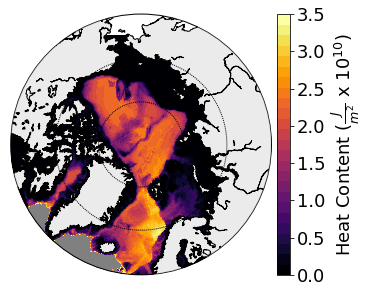

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
pFWC = plot_arctic(axes,pHC[300:,:],label_heat,min_log = 0.0, max_scale=3.5)

# fig, axes = plt.subplots(1, 2, figsize=(10,5))
# label = 'Fresh water Content (m)'
# label2 = 'Depth of 34.8 isopycnal (m)'
# plotFWC = plot_arctic(axes[0],pFWC[300:,:],label,min_log = 0, max_scale=30)
# plotdep = plot_arctic(axes[1],pdep[300:,:],label2)

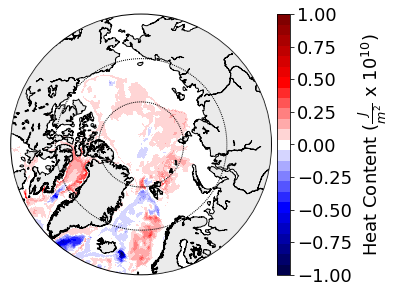

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
pFWC = plot_arctic(axes,cHC[300:,:]-pHC[300:,:],label_heat,min_log = -1, max_scale=1.0,diffplot=True)

# fig, axes = plt.subplots(1, 2, figsize=(13,5))
# label = 'Fresh water Content (m)'
# label2 = 'Depth of 34.8 isopycnal (m)'
# plotFWC = plot_arctic(axes[0],cFWC[300:,:] - sjFWC[300:,:],label,min_log = -10, max_scale=10,diffplot=True)
# plotdep = plot_arctic(axes[1],cdep[300:,:]-sjdep[300:,:],label2,min_log = -400, max_scale=100)
# plt.tight_layout

In [27]:
np.sum(cHC[300:,:]-pHC[300:,:])

1953.9767763474947

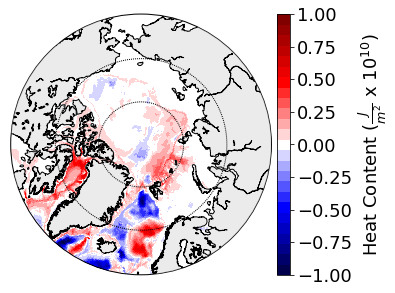

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
pFWC = plot_arctic(axes,cHC[300:,:]-sjHC[300:,:],label_heat,min_log = -1, max_scale=1.0,diffplot=True)

# fig, axes = plt.subplots(1, 2, figsize=(13,5))
# label = 'Fresh water Content (m)'
# label2 = 'Depth of 34.8 isopycnal (m)'
# plot_arctic(axes[0],cFWC[300:,:] - pFWC[300:,:],label,min_log = -10, max_scale=10,diffplot=True)
# plot_arctic(axes[1],cdep[300:,:]-pdep[300:,:],label2,min_log = -400, max_scale=100)

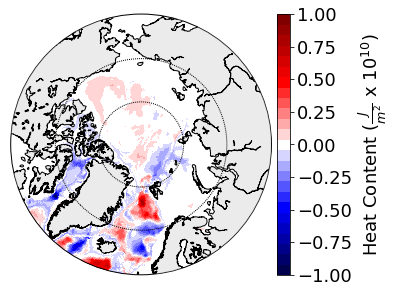

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
pFWC = plot_arctic(axes,sjHC[300:,:]-pHC[300:,:],label_heat,min_log = -1, max_scale=1.0,diffplot=True)

# fig, axes = plt.subplots(1, 2, figsize=(13,5))
# label = 'Fresh water Content (m)'
# label2 = 'Depth of 34.8 isopycnal (m)'
# plot_arctic(axes[0],sjFWC[300:,:] - pFWC[300:,:],label,min_log = -20, max_scale=20,diffplot=True)
# plot_arctic(axes[1],sjdep[300:,:]-pdep[300:,:],label2,min_log = -100, max_scale=400)

## need to look at the air sea fluxes to make sense of the HC vs. the transect fluxes

In [38]:
pasflux = ma.array(nc.Dataset(polzin+'2012-2016avg_iocetflx.nc').variables['iocetflxfour'],mask=(mask[0,:,:]-1)*-1)
sjasflux = ma.array(nc.Dataset(stlandj+'2012-2016avg_iocetflx.nc').variables['iocetflxfour'],mask=(mask[0,:,:]-1)*-1)
casflux = ma.array(nc.Dataset(control_storage+'2012-2016avg_iocetflx.nc').variables['iocetflxfour'],mask=(mask[0,:,:]-1)*-1)

In [62]:
flux = nc.Dataset(polzin+'y2012m12d31_icemod.nc')
flux.variables

OrderedDict([(u'nav_lon', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
                  units: degrees_east
                  valid_min: -179.997
                  valid_max: 180.0
                  long_name: Longitude
                  nav_model: Default grid
              unlimited dimensions: 
              current shape = (800, 544)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'nav_lat', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
                  units: degrees_north
                  valid_min: -20.0761
                  valid_max: 89.9479
                  long_name: Latitude
                  nav_model: Default grid
              unlimited dimensions: 
              current shape = (800, 544)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'deptht', <type 'netCDF4._netCDF4.Variable'>
              float32 deptht(deptht)
                  uni

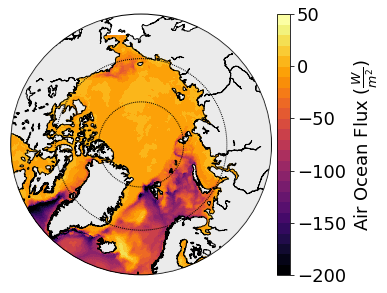

In [67]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
label_flux = 'Air Ocean Flux ('+r'$\frac{W}{m^2}$'+')'
cflux = plot_arctic(axes, casflux[300:,:],label_flux,min_log = -200, max_scale=50)

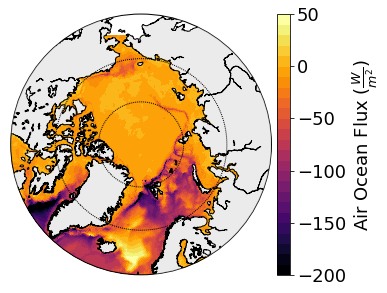

In [68]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
label_flux = 'Air Ocean Flux ('+r'$\frac{W}{m^2}$'+')'
cflux = plot_arctic(axes, sjasflux[300:,:],label_flux,min_log = -200, max_scale=50)

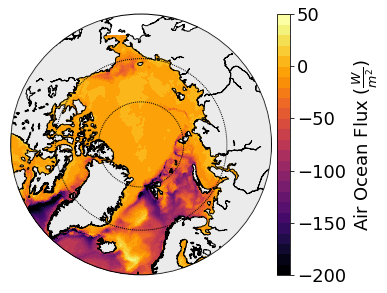

In [69]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
label_flux = 'Air Ocean Flux ('+r'$\frac{W}{m^2}$'+')'
cflux = plot_arctic(axes, pasflux[300:,:],label_flux,min_log = -200, max_scale=50)

-384751.782407


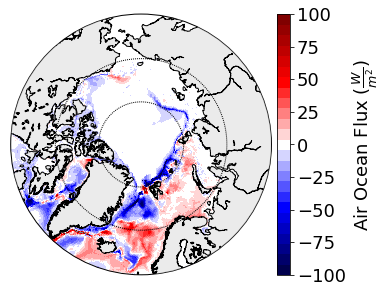

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
pFWC = plot_arctic(axes,np.absolute(casflux[300:,:])-np.absolute(sjasflux[300:,:]),label_flux,min_log = -100, max_scale=100.0,diffplot=True)
print(np.sum(np.absolute(casflux[300:,:])-np.absolute(sjasflux[300:,:])))

-103248.325263


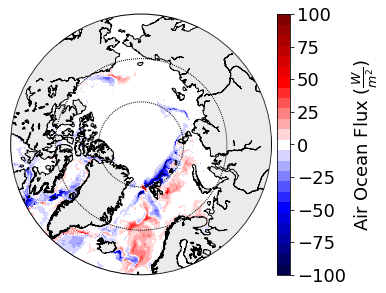

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
pFWC = plot_arctic(axes,np.absolute(casflux[300:,:])-np.absolute(pasflux[300:,:]),label_flux,min_log = -100, max_scale=100.0,diffplot=True)
print(np.sum(np.absolute(casflux[300:,:])-np.absolute(pasflux[300:,:])))

281503.457144


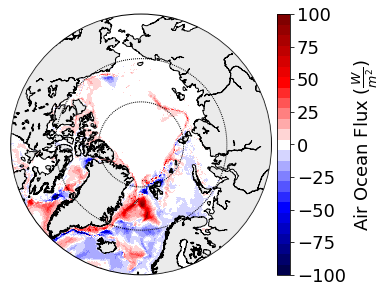

In [65]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
pFWC = plot_arctic(axes,np.absolute(sjasflux[300:,:])-np.absolute(pasflux[300:,:]),label_flux,min_log = -100, max_scale=100.0,diffplot=True)
print(np.sum(np.absolute(sjasflux[300:,:])-np.absolute(pasflux[300:,:])))